# 1. Theoretical part

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 simple graph

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from([1, 2, 3, 4, 5])

In [4]:
G.add_edges_from([(1, 2), (1, 3),(1,4),(1,5),(2,1),(2,4),(3,1),(3,4),(3,5),(4,1),(4,2),(4,3),(5,1),(5,3)])

In [5]:
G.number_of_edges()

7

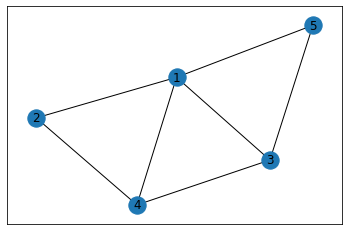

In [6]:
nx.draw_networkx(G)

In [7]:
# adjacency matric representation
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1]
 [1 0 0 1 0]
 [1 0 0 1 1]
 [1 1 1 0 0]
 [1 0 1 0 0]]


In [8]:
# degree
G.degree([1, 2, 3 , 4, 5])

DegreeView({1: 4, 2: 2, 3: 3, 4: 3, 5: 2})

In [9]:
# eigenvector centrality
centrality = nx.eigenvector_centrality(G)
centrality

{1: 0.5590326188442775,
 2: 0.35054183735438676,
 3: 0.46995923844336235,
 4: 0.46995923844336235,
 5: 0.35054183735438676}

In [10]:
# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

In [11]:
betweenness_centrality

{1: 0.3333333333333333,
 2: 0.0,
 3: 0.08333333333333333,
 4: 0.08333333333333333,
 5: 0.0}

#### iii Discuss what information each type of centrality calculated in (ii) gives you about the individual vertices and how they differ.

Eigenvector centrality gives us the measure of the influence of each node in this network. Since it is an undirected graph and plus no weight is represented by each nodes, the node highly linked shows higher eigenvector centrality here.(e.g. node1)

Betweenness centrality quantifies how many times a particular node comes in the shortest chosen path between two other nodes which is different from eigenvector centrality. Betweenness centrality represents the degree to which nodes strand between each other, so it is related to the connectivity of the network. The value calculated here tells us higher betweenness vertices have higher potential do disconnect the graph if removed. 

#### iv bipartite graph

In [12]:
from networkx.algorithms import bipartite

In [13]:
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3], bipartite=0)
G2.add_nodes_from([4, 5], bipartite=1)


In [14]:
G2.add_edges_from([(1,4),(1,5),(2,4),(3,4),(3,5)])

In [15]:
top = nx.bipartite.sets(G2)[0]
pos = nx.bipartite_layout(G2, top)

In [16]:
# nx.draw_networkx(G2)
# need to figure out this later

In [17]:
# betweenness centrality
betweenness_centrality2 = nx.betweenness_centrality(G2)
betweenness_centrality2

{1: 0.16666666666666666,
 2: 0.0,
 3: 0.16666666666666666,
 4: 0.5833333333333333,
 5: 0.08333333333333333}

### idk how to do this
Is it possible to derive a generalized solution for the betweenness centralities of complete bipartite graphs? If yes, please provide the mathematical derivation and result.

## 1.2 a directed graph

### i

In [18]:
dir_G = nx.DiGraph()
dir_G.add_nodes_from([1, 2, 3, 4, 5 , 6])

In [19]:
dir_G.add_edges_from([(1, 2),(2,3),(3,1),(1,5),(4,3),(4,5),(4,6),(6,5)])

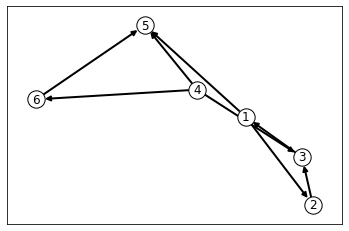

In [20]:
nx.draw_networkx(dir_G,node_color='w', edgecolors='k', width=2.0, with_labels=True)

In [21]:
# adjacency matrix
A_dir = nx.adjacency_matrix(dir_G)
print(A_dir.todense())

[[0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


In [22]:
#adjacency list:
nx.to_dict_of_lists(dir_G)

{1: [2, 5], 2: [3], 3: [1], 4: [3, 5, 6], 5: [], 6: [5]}

In [23]:
# edge list
nx.to_edgelist(dir_G)

OutEdgeDataView([(1, 2, {}), (1, 5, {}), (2, 3, {}), (3, 1, {}), (4, 3, {}), (4, 5, {}), (4, 6, {}), (6, 5, {})])

### ii

In [24]:

A_dir_matrix = A_dir.todense()

In [25]:
A_dir_matrix

matrix([[0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]])

In [26]:
A_dir_square = A_dir_matrix * A_dir_matrix
A_dir_square

matrix([[0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

In [27]:
G_square = nx.DiGraph() 
G_square.add_nodes_from([1, 2, 3, 4, 5 , 6])
G_square.add_edges_from([(1, 2),(1,4),(2,3),(5,3),(3,1),(5,3),(5,4)])

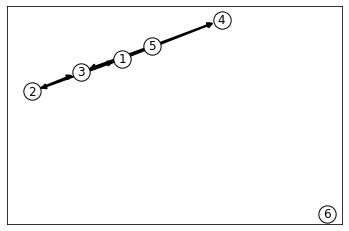

In [28]:
nx.draw_networkx(G_square,node_color='w', edgecolors='k', width=2.0, with_labels=True)

In [29]:
nx.betweenness_centrality(G_square)

{1: 0.2, 2: 0.05, 3: 0.2, 4: 0.0, 5: 0.0, 6: 0.0}

In [30]:
nx.eigenvector_centrality(G_square)

{1: 0.4999992400396687,
 2: 0.49999888241238627,
 3: 0.4999992400396687,
 4: 0.500002637498852,
 5: 1.7881364122693114e-07,
 6: 1.7881364122693114e-07}

#### Comment on what each element of A2 represents.

The number of edges decrease from 7 to 6. And the Vertice 6 is not connected with the network anymore.
Vertices 1 and 3 share same betweeness centrality and eigenvector centrality, while vertices 4,5 and 6 show 0 betweenness centrality within the directed graph. Surprisingly, v4 has the highest eigenvector centrality but 0 betweenness centrality. V5 and 6 represent loweset eigenvector centrality which means these two nodes do not have vital impact to the network.



### iii

In [31]:
# suppose it is undirected graph
undir_G = nx.Graph()
undir_G.add_nodes_from([1, 2, 3, 4, 5 , 6])

In [32]:
undir_G = nx.Graph()
undir_G.add_nodes_from([1, 2, 3, 4, 5,6])
A_undir = np.array([[0, 1, 1, 0, 1, 0],
              [1, 0, 1, 0, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 0, 1, 0, 1, 1],
              [1, 0, 0, 1, 0, 1],
              [0, 0, 0, 1, 1, 0]])


In [33]:
undir_G = nx.from_numpy_matrix(A_undir)

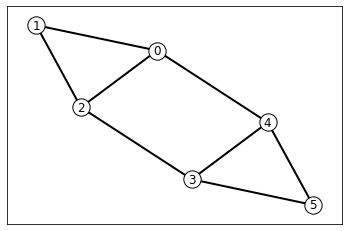

In [34]:
nx.draw_networkx(undir_G,node_color='w', edgecolors='k', width=2.0, with_labels=True)

In [35]:
A_undir_square = A_undir * A_undir
A_undir_square

array([[0, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 0]])

# 2. Programming part